# Deepdoctection

Taken from [deepdoctection github - A Document AI Package - Jupyter notebook tutorial](https://github.com/deepdoctection/notebooks)_

# References

* [Readthedocs - About deepdoctection](https://deepdoctection.readthedocs.io/en/latest/why/)
* [Youtube - Janis Meyer: deepdoctection - An open source package for document intelligence](https://www.youtube.com/watch?v=EXmJjpEQxrM)
* 

# Overview

Inputs can be native PDFs or images. 


# Installation

* [Installation](https://deepdoctection.readthedocs.io/en/latest/install/)

## Prerequisite

* CUDA driver
* CUDA Toolkit
* Pytorch
* [poppler](https://poppler.freedesktop.org/) for PDF rendering.
* [Detectron2](https://detectron2.readthedocs.io/en/latest/tutorials/install.html) for object detection.
* [Tesseract OCR](https://github.com/tesseract-ocr/tesseract)
* Pillow or OpenCV
```
If you want to use OpenCV, set the environment variable USE_OPENCV=True.
```


Not using with TF as it needs Tensorpack developed for TF1.x although it runs with TF2 with compat.v1.

## Ubuntu Installation (22.04LTS)

### tesseract-ocr

* [Installation](https://tesseract-ocr.github.io/tessdoc/Installation.html)

> There are two parts to install, the engine itself, and the traineddata for the languages. In case apt is unable to find the package try adding universe entry to the sources.list file as shown below.
> ```
> deb http://archive.ubuntu.com/ubuntu bionic universe
> ```



```
#--------------------------------------------------------------------------------
# tesseract-ocr
#--------------------------------------------------------------------------------
sudo apt install libtesseract-dev
sudo apt install tesseract-ocr

#--------------------------------------------------------------------------------
# tesseract language data
#--------------------------------------------------------------------------------
# https://stackoverflow.com/a/36309375/4281353
# TesseractError: (1, 'Error opening data file /usr/share/tesseract-ocr/4.00/tessdata/deu.traineddata
# Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory.
# Failed loading language \'deu\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')
# Check https://github.com/tesseract-ocr/tessdata for a full list of trained language data.
sudo apt install tesseract-ocr-eng  #for english
sudo apt install tesseract-ocr-deu  #for deutsch (German)
```

### detectron2

```
python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
```

or in requirements.txt:

```
detectron2 @git+https://github.com/facebookresearch/detectron2.git
```

### deepdoctection

> This will install deepdoctection with all dependencies above the deepdoctection layer.

```
pip install deepdoctection[pt]
```


In [1]:
%env USE_OPENCV=True

env: USE_OPENCV=True


In [2]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML

import deepdoctection as dd

2023-11-28 16:56:32.904597: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 16:56:32.904621: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 16:56:32.904638: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Sample

Take an image (e.g. .png, .jpg, ...). If you take the example below you'll maybe need to change ```image_path```.

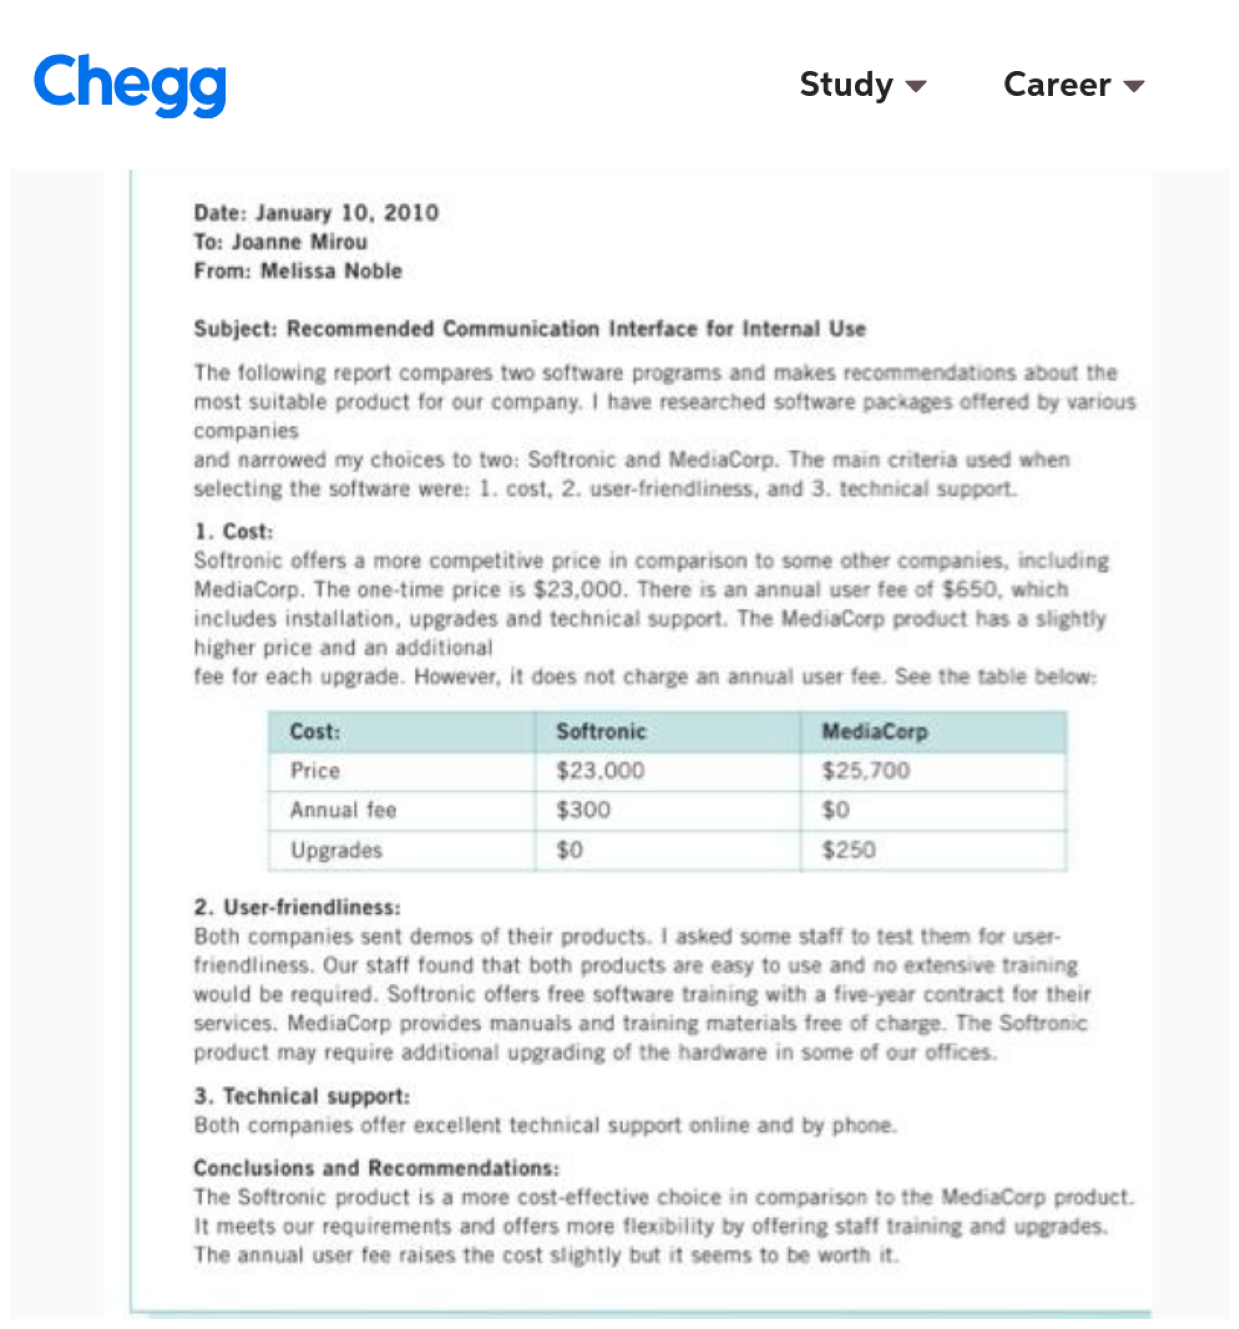

In [3]:
image_path = Path.cwd() / "pics/samples/misc/report_02.png"
image = cv2.imread(image_path.as_posix())
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

## Analyzer

Next, we instantiate the **deep**doctection analyzer. The analyzer is an example of a pipeline that can be built depending on the problem you want to tackle. This particular pipeline is built from various building blocks. We will come back to this later. 

Because the document is german we will be using Tesseract's model trained on german text (config_overwrite=["LANGUAGE='deu'"]). If you have a document in a different language choose one by entering its [LangCode](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html). Here are some examples: `fra`, `nld`, `chi_sim`, `ces`, `fas`, `ell`, `mkd`, `ron`, `hye`, `kat`. 

This will give you, depending on your language, much better results than using the default english model.

In [4]:
analyzer = dd.get_dd_analyzer(config_overwrite=["LANGUAGE='eng'"])

[1128 16:56.39 @dd.py:422]  INF  Config: 
 {'DEVICE': 'cuda',
 'LANGUAGE': 'eng',
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
                 'PAD': {'BOTTOM': 60, 'LEFT': 60, 'RIGHT': 60, 'TOP':

## Analyze methods

Once all models have been loaded, we can process single pages, multi page PDF-documents or `Dataflow`s. Leaving `Dataflow`s aside for now, you can either set `path='path/to/dir'` if you have a folder of images or `path='path/to/my/doc.pdf'` if you have a pdf document. 

You will receive an error if your path points to a single image. Processing images requires to pass the path to the base image directory.

In [5]:
path = Path.cwd() / "pics/samples/misc"

df = analyzer.analyze(path=path)
df.reset_state()  # This method must be called just before starting the iteration. It is part of the API.

|                                                                                                                                                                |2/?[00:00<00:00,5246.16it/s]


In [40]:
dir(df)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'df',
 'func',
 'reset_state']

You can see, when activating the cell, that not much has happened yet. The reason is that `analyze` is a [generator function](https://wiki.python.org/moin/Generators). It does not return instantly any results. Instead it returns a `Dataflow`. 

A `Dataflow` is an object to create iterators for data loading and data processing. You can traverse through all the values of the `Dataflow` simply by using a `for`-loop or the `next` function. Let's go!  

In [6]:
# https://stackoverflow.com/a/36309375/4281353
# TesseractError: (1, 'Error opening data file /usr/share/tesseract-ocr/4.00/tessdata/deu.traineddata 
# Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. 
# Failed loading language \'deu\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')
doc=iter(df)

In [7]:
page = next(doc)

[1128 16:56.43 @doctectionpipe.py:84]  INF  Processing report_01.png
/home/eml/venv/ml/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[1128 16:56.44 @context.py:126]  INF  ImageLayoutService total: 0.4152 sec.
[1128 16:56.44 @context.py:126]  INF  SubImageLayoutService total: 0.1176 sec.
[1128 16:56.44 @context.py:126]  INF  SubImageLayoutService total: 0.076 sec.
[1128 16:56.44 @context.py:126]  INF  TableSegmentationService total: 0.0031 sec.
[1128 16:56.44 @maputils.py:89]  WRN  MappingContextManager error. Will filter annotation
[1128 16:56.44 @maputils.py:89]  WRN  MappingContextManager error. Will filter annotation
[1128 16:56.44 @maputils.py:89]  WRN  MappingContextManager error. Will filter annotation
[1128 16:56.44 @maputils.py

In [8]:
for attr in dir(page):
    if not attr.startswith("_"):
        print(attr)

add_attribute_name
annotations
as_dict
chunks
clear_image
define_annotation_id
document_id
dump
embeddings
external_id
file_name
floating_text_block_categories
from_dict
from_file
from_image
get_annotation
get_annotation_iter
get_attribute_names
get_categories_from_current_state
get_embedding
get_image
get_state_attributes
get_token
height
image
image_ann_to_image
image_id
image_orig
layouts
location
maybe_ann_to_sub_image
page_number
pdf_bytes
remove
remove_image_from_lower_hierachy
remove_keys
save
set_embedding
set_width_height
state_id
summary
tables
text
text_
text_container
text_no_line_break
viz
width
words


## Page

Let's see what we got back. For each iteration we receive a `Page` object. This object stores all informations that have been collected from a page document when running through the pipeline. 

In [9]:
type(page)

deepdoctection.datapoint.view.Page

Let's also have a look on some top level information. 

In [10]:
print(f" height: {page.height} \n width: {page.width} \n file_name: {page.file_name} \n document_id: {page.document_id} \n image_id: {page.image_id}\n")

 height: 875.0 
 width: 784.0 
 file_name: report_01.png 
 document_id: c59f5cb0-c41c-37d0-9334-465992a02a39 
 image_id: c59f5cb0-c41c-37d0-9334-465992a02a39


`document_id` and `image_id` are the same. The reason is because we only process a single image. The naming convention silently assumes that we deal with a one page document. Once we process multi page PDFs `document_id` and `image_id` differ.

With `get_attribute_names()` you get a list of all attributes. 

In [11]:
page.get_attribute_names()

{'chunks',
 'document_id',
 <PageType.document_type>,
 'file_name',
 <PageType.language>,
 'layouts',
 'location',
 'page_number',
 'tables',
 'text',
 'words'}

In [32]:
page.document_type, page.language, page.file_name, page.page_number

(None, None, 'report_01.png', 0)

In [39]:
page.layouts[0].bbox

[18.0, 777.0, 315.0, 800.0]

`page.document_type` and `page.language` both return None. The reason is that the analyzer has no component for predicting a document type or a language.

You can easily build a custom analyzer/pipeline containing a document classifier, though. Check this [notebook](Using_LayoutLM_for_sequence_classification.ipynb) for further information.

## Layout segments

We can visualize detected layout segments. If you set `interactive=True` a viewer will pop up. Use `+` and `-` to zoom out/in. Use `q` to close the page.

Alternatively, you can visualize the output with matplotlib.

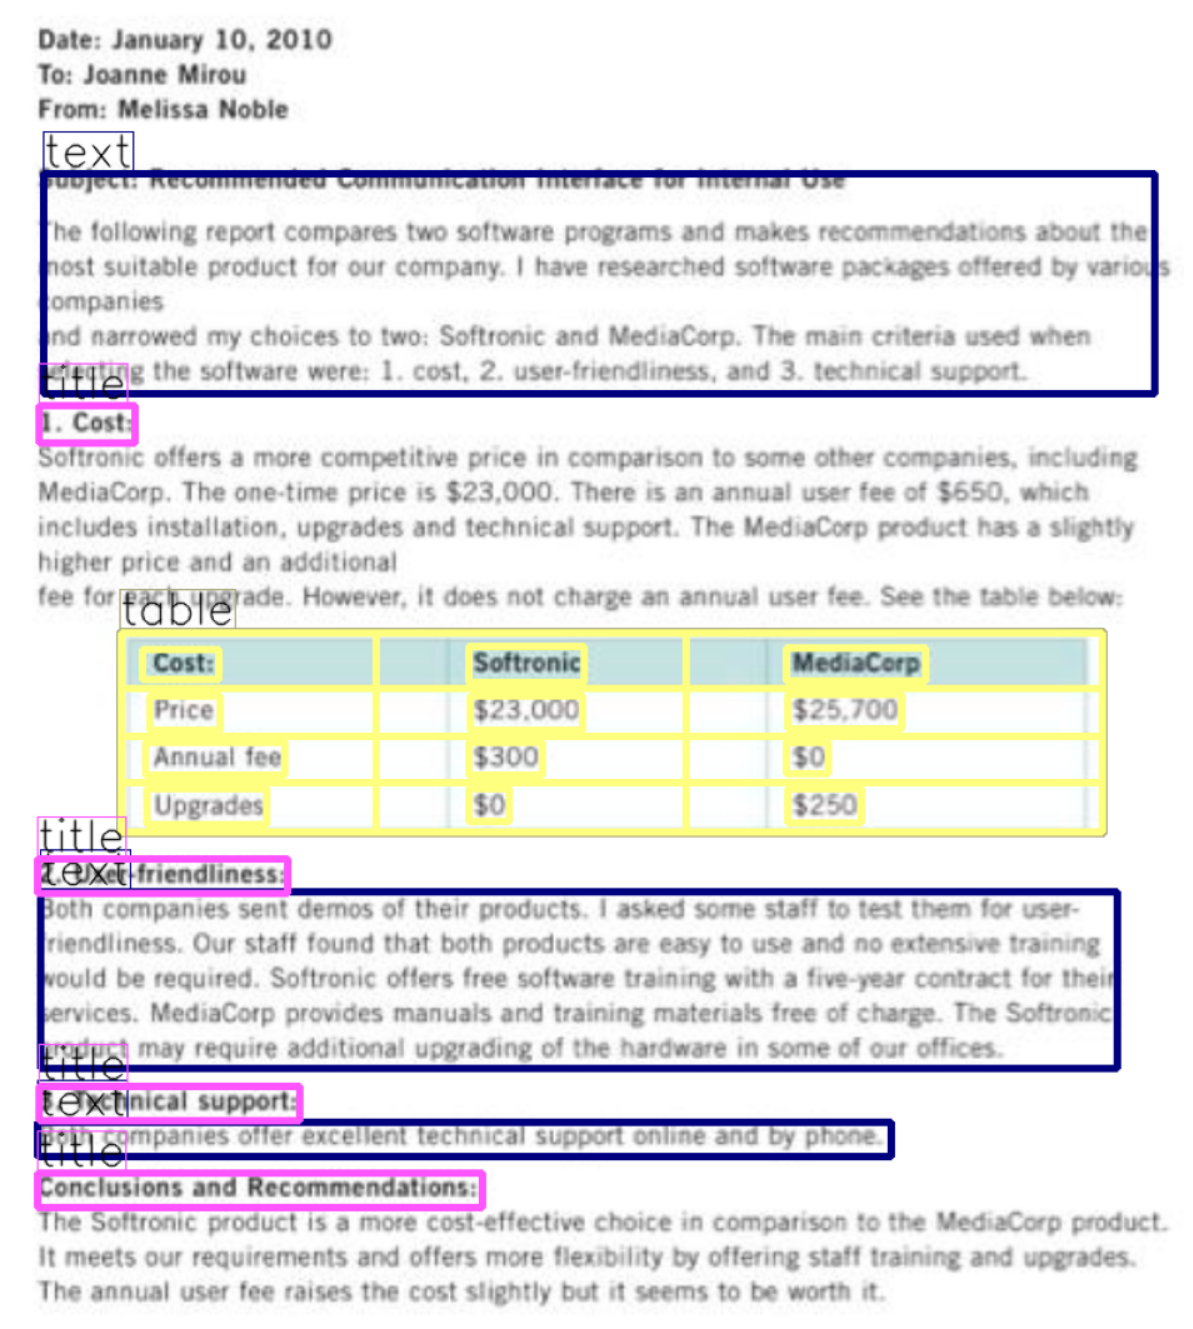

In [13]:
image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

Let's have a look at other attributes. We can use the `text` property to get the content of the document. You will notice that the table is not included. You can therefore filter tables from the other content. In fact you can even filter on every layout segment.

In [14]:
print(page.text)

Recommended Communication Interface for Internal Use The following report compares two software programs and makes recommendations about the most suitable product for our company. | have researched software packages offered by various companies and my narrowed choices to two: and Softronic MediaCorp. The main criteria used when selecting the software were: 1. cost, 2. user-friendliness, and 3. technical support.
1. Cost:
2. User-friendliness:
Both companies sent demos of their products, | asked some staff to test them for user- friendliness. Our staff found that both products are easy to use and no extensive training would be required. Softronic offers free software training with a five-year contract for their services. MediaCorp provides manuals and training materials tree of charge. The Softronic product may require additional upgrading of the hardware in some of our offices.
3. Technical support:
Both companies offer excellent technical support online and by phone.
Conclusions and R

# Layout

You can get the individual layout segments like `text`, `title`, `list` or `figure`. 

In [15]:
for layout in page.layouts:
    print(str(layout.category_name))
    if layout.category_name=="title":
        print(f"Title: {layout.text}")

LayoutType.title
Title: Conclusions and Recommendations:
LayoutType.title
Title: 1. Cost:
LayoutType.title
Title: 3. Technical support:
LayoutType.text
LayoutType.title
Title: 2. User-friendliness:
LayoutType.text
LayoutType.text


In [52]:
page

AttributeError: Attribute relationships is not supported for <class 'deepdoctection.datapoint.view.Page'>

In [41]:
dir(page.layouts[0])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_annotation_id',
 '_assert_attributes_have_str',
 '_category_name',
 'active',
 'annotation_id',
 'as_dict',
 'base_page',
 'bbox',
 'bounding_box',
 'category_id',
 'category_name',
 'deactivate',
 'dump_relationship',
 'dump_sub_category',
 'external_id',
 'from_dict',
 'get_attribute_names',
 'get_bounding_box',
 'get_defining_attributes',
 'get_ordered_words',
 'get_relationship',
 'get_state_attributes',
 'get_sub_category',
 'get_s

In [55]:
page.layouts[0].bbox

[18.0, 777.0, 315.0, 800.0]

You can also get the layout segments from the `chunks` attribute. The output is a list of tuples with the most essential meta data for each layout segment, namely: `document_id, image_id, page_number, annotation_id, reading_order, category_name` and `text`.

In [16]:
page.chunks[0]

('c59f5cb0-c41c-37d0-9334-465992a02a39',
 'c59f5cb0-c41c-37d0-9334-465992a02a39',
 0,
 '33f49a71-122b-3db5-9a8a-e4602ebe8c9c',
 1,
 <LayoutType.text>,
 'Recommended Communication Interface for Internal Use The following report compares two software programs and makes recommendations about the most suitable product for our company. | have researched software packages offered by various companies and my narrowed choices to two: and Softronic MediaCorp. The main criteria used when selecting the software were: 1. cost, 2. user-friendliness, and 3. technical support.')

# Tables

Tables cannot be retrieved from `page.layouts`. They have a special `page.tables` which is a python list of table objects. Obviously, only one table has been detected. 

In [17]:
len(page.tables)

1

Let's have a closer look at the table. 

In [18]:
table = page.tables[0]
table.get_attribute_names()

{'bbox',
 'cells',
 'columns',
 'csv',
 <TableType.html>,
 <TableType.item>,
 <TableType.max_col_span>,
 <TableType.max_row_span>,
 <TableType.number_of_columns>,
 <TableType.number_of_rows>,
 <Relationships.reading_order>,
 'rows',
 'text',
 'words'}

In [57]:
dir(table)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_annotation_id',
 '_assert_attributes_have_str',
 '_category_name',
 'active',
 'annotation_id',
 'as_dict',
 'base_page',
 'bbox',
 'bounding_box',
 'category_id',
 'category_name',
 'cells',
 'columns',
 'csv',
 'deactivate',
 'dump_relationship',
 'dump_sub_category',
 'external_id',
 'from_dict',
 'get_attribute_names',
 'get_bounding_box',
 'get_defining_attributes',
 'get_ordered_words',
 'get_relationship',
 'get_state_attributes'

In [61]:
table.number_of_rows

4

In [19]:
print(f" number of rows: {table.number_of_rows} \n number of columns: {table.number_of_columns} \n reading order: {table.reading_order}")

 number of rows: 4 
 number of columns: 3 
 reading order: None


There is no reading order. The reason is that we have excluded tables from having a specific reading order position because we want to separate tables from the narrative text. This is pure customizing and we can change the customizing so that tables are part of the narrative text. We will come to this later.

You can get an html, csv or text version of your table. Use `table.csv` to load the table into a Pandas Dataframe.

In [20]:
HTML(table.html)

,,
Price,"$23,000","$25,700"
"""Annual fee",,$0
Uoerades,$0,


In [21]:
table.csv

[[' ', ' ', ' '],
 ['Price ', '$23,000 ', '$25,700 '],
 ['"Annual fee ', ' ', '$0 '],
 ['Uoerades ', '$0 ', ' ']]

In [22]:
table.text

'      \n Price  $23,000  $25,700  \n "Annual fee    $0  \n Uoerades  $0    \n'

Let's go deeper down the rabbit hole. A `Table` has cells and we can even get the text of one particular cell. Note that the output list is not sorted by row or column. You have to do it yourself.

In [23]:
cell = table.cells[0]
cell.get_attribute_names()

{'bbox',
 <CellType.body>,
 <CellType.column_header>,
 <CellType.column_number>,
 <CellType.column_span>,
 <CellType.header>,
 <CellType.projected_row_header>,
 <Relationships.reading_order>,
 <CellType.row_header>,
 <CellType.row_number>,
 <CellType.row_span>,
 <CellType.spanning>,
 'text',
 'words'}

In [24]:
print(f"column number: {cell.column_number} \n row_number: {cell.row_number} \n text: {cell.text} \n annotation_id: {cell.annotation_id}")

column number: 1 
 row_number: 3 
 text: "Annual fee 
 annotation_id: 786d0dd4-d28a-3b94-b7e7-e1554420efe8


Still not down yet, we have a list of words that is responsible to generate the text string.

In [25]:
word = cell.words[0]
word.get_attribute_names()

{'bbox',
 <WordType.block>,
 <WordType.character_type>,
 <WordType.characters>,
 <WordType.handwritten>,
 <WordType.printed>,
 <Relationships.reading_order>,
 <WordType.tag>,
 <WordType.text_line>,
 <WordType.token_class>,
 <WordType.token_tag>}

In [62]:
dir(word)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_annotation_id',
 '_assert_attributes_have_str',
 '_category_name',
 'active',
 'annotation_id',
 'as_dict',
 'base_page',
 'bbox',
 'bounding_box',
 'category_id',
 'category_name',
 'deactivate',
 'dump_relationship',
 'dump_sub_category',
 'external_id',
 'from_dict',
 'get_attribute_names',
 'get_bounding_box',
 'get_defining_attributes',
 'get_relationship',
 'get_state_attributes',
 'get_sub_category',
 'get_summary',
 'image',
 'relationships

The reading order determines the string position of the word characters in a cell segment. 

When inferring the reading order of a page we therefore have to distinguish between high and low level reading orders: A high level reading order where layout segments such as `title`, `text` or `cell` are being involved and a low word level reading order where `word`s have to be arranged into some narrative text.  

Let's look at some more attributes.

In [26]:
print(f" characters: {word.characters} \n reading order: {word.reading_order} \n token class: {word.token_class}")

 characters: "Annual 
 reading order: 1 
 token class: None


## Saving and reading

You can use the `save` method to save the result of the analyzer in a `.json` file. Setting `image_to_json=True` you will also save image as b64 encoding in the file. Beware, the files are quite large then. 

In [27]:
page.save(image_to_json=True, path="./result/samples/misc/report.json")

Having saved the results you can easily parse the file into the `Page` format without loosing any information. 

In [28]:
page = dd.Page.from_file(file_path="./result/samples/misc/report.json")

The `Page` object is read-only and even though you can change the value it will not be persisted.

In [29]:
word.token_class = "ORG"

In [30]:
word #  __repr__ of the base object does carry <WordType.token_class> information.  

Word(active=True, _annotation_id='bcdc8190-95cc-3451-940e-756df7ca849c', category_name=<LayoutType.word>, _category_name=<LayoutType.word>, category_id='1', score=0.26, sub_categories={<WordType.characters>: ContainerAnnotation(active=True, _annotation_id='00953a9b-778c-3fee-af20-8af22f78f252', category_name=<WordType.characters>, _category_name=<WordType.characters>, category_id='None', score=0.26, sub_categories={}, relationships={}, value='"Annual'), <Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='c652e5bd-389f-305d-a730-ac5178190719', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='1', score=None, sub_categories={}, relationships={})}, relationships={}, bounding_box=BoundingBox(absolute_coords=True, ulx=82, uly=484, lrx=150, lry=506, height=22, width=68))

There is no easy way yet to modify results. In tutorial **Diving deeper into the data structure** we will show how you can do this. 

## Where to go from here

If you want to get a deeper understanding how a pipeline is composed, we suggest to look at the [pipeline notebook](./Pipelines.ipynb).